In [20]:
from jass.game.game_sim import GameSim
from jass.game.rule_schieber import RuleSchieber
import numpy as np
from tqdm import tqdm

from play_strategy.nn.mcts.mcts_tree import MCTS
from play_strategy.random_play_strategy import RandomPlayStrategy

In [21]:
deck = np.arange(36)
np.random.seed(42)
deck = np.random.permutation(deck)
deck = deck.reshape(4, 9)
new_deck = np.zeros((4, 36))
new_deck[np.arange(4)[:, None], deck] = 1
deck = new_deck
deck, deck.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.]]),
 (4, 36))

In [37]:
game_sim = GameSim(RuleSchieber())
game_sim.init_from_cards(deck, 0)
game_sim.action_trump(1)

mcts = MCTS()
iterations = [1000] * 100

full_results = []
prev_root = None
for i in tqdm(iterations):
    mcts.search(game_sim.state, iterations=i, root=prev_root)
    mcts.root.children.sort(key=lambda x: x.card)
    full_results.append([x.score for x in mcts.root.children])
    prev_root = mcts.root

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


In [39]:
mcts.root.children[0].n_simulated

10417

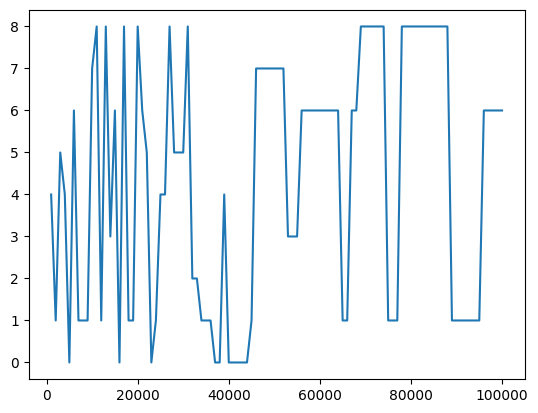

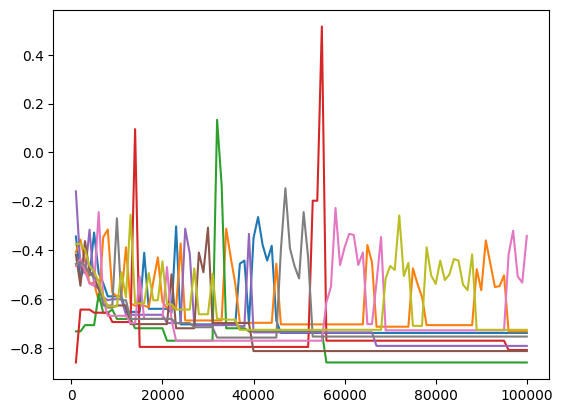

In [40]:
import matplotlib.pyplot as plt

iterations_labels = [i * 1000 for i in range(1, 101)]
plt.plot(iterations_labels, [np.argmax(x) for x in full_results])
plt.show()
plt.plot(iterations_labels, full_results, label="Scores")
plt.show()

# Conclusion
No optimal n iteration can be calculated for the depth=0 (9 cards)

In [41]:
deck = np.arange(36)
np.random.seed(42)
deck = np.random.permutation(deck)
deck = deck.reshape(4, 9)
new_deck = np.zeros((4, 36))
new_deck[np.arange(4)[:, None], deck] = 1
deck = new_deck
deck, deck.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.]]),
 (4, 36))

In [42]:
game_sim = GameSim(RuleSchieber())
game_sim.init_from_cards(deck, 0)
game_sim.action_trump(1)

In [43]:
random_play_strategy = RandomPlayStrategy(seed=43)
for i in range(6):
    for player in range(4):
        card = random_play_strategy.choose_card(game_sim.get_observation())
        game_sim.action_play_card(card)

In [44]:
game_sim.state.hands.sum(axis=1)

array([3., 3., 3., 3.])

In [45]:
game_sim.state

{'dealer': 0, 'player': 2, 'trump': 1, 'forehand': 1, 'declared_trump': 3, 'hands': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]]), 'tricks': array([[18, 23, 15, 12],
       [26, 10, 24,  9],
       [29, 30, 28, 33],
       [ 7, 11,  5,  8],
       [ 2,  0, 16,  6],
       [31, 20, 27, 34],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]]), '

In [46]:
mcts = MCTS()
iterations = [100] * 100

results = []
prev_root = None
for i in tqdm(iterations):
    mcts.search(game_sim.state, iterations=i, root=prev_root)
    mcts.root.children.sort(key=lambda x: x.card)
    results.append([x.score for x in mcts.root.children])
    prev_root = mcts.root

100%|██████████| 100/100 [00:00<00:00, 317.15it/s]


In [47]:
mcts.root.children[0].n_simulated

343

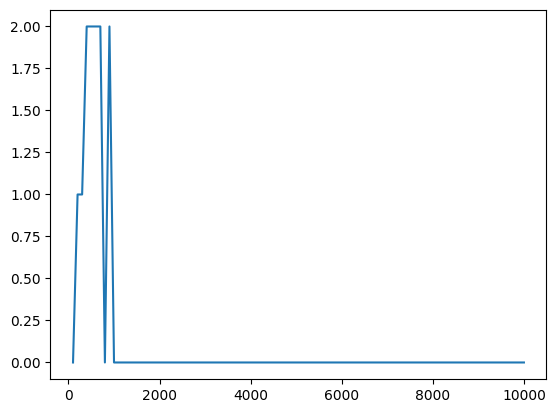

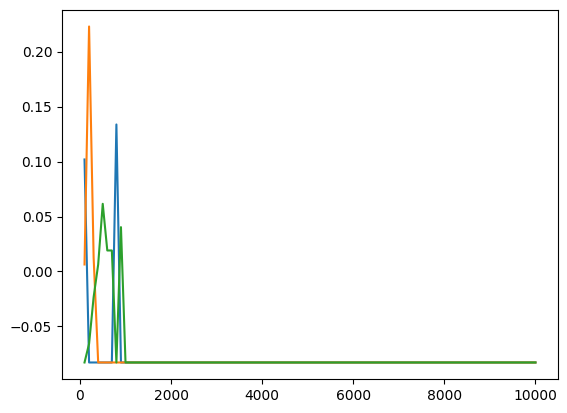

In [48]:
import matplotlib.pyplot as plt

iterations_labels = [i * 100 for i in range(1, 101)]
plt.plot(iterations_labels, [np.argmax(x) for x in results])
plt.show()
plt.plot(iterations_labels, results)
plt.show()